## Imports

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import os
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

## Data

https://www.kaggle.com/datasets/paultimothymooney/stock-market-data

In [3]:
nasdaq = './stock_market_data/nasdaq/csv'

appl = os.path.join(nasdaq, 'AAPL.csv')
appl_df = pd.read_csv(appl)

appl_df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...,...
10585,06-12-2022,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
10586,07-12-2022,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
10587,08-12-2022,141.100006,142.360001,62128300,143.520004,142.649994,142.649994
10588,09-12-2022,140.899994,142.339996,76069500,145.570007,142.160004,142.160004


In [4]:
appl_prices = appl_df.loc[:,'Close']
appl_prices

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10585    142.910004
10586    140.940002
10587    142.649994
10588    142.160004
10589    142.320007
Name: Close, Length: 10590, dtype: float64

# Time2Vec

Vector embedding technique for time series data proposed in https://arxiv.org/abs/1907.05321

## Formulation

$$\textbf{t2v}(\tau)[0] = \omega_i\tau + \phi_i$$
$$\textbf{t2v}(\tau)[i] = F(\omega_i\tau + \phi_i)$$

where:
* $\textbf{t2v}(\tau)[i]$ is the $i^{th}$ element of $\textbf{t2v}(\tau)$
* F is a periodic activation (sine)
* $\omega_i$ and $\phi_i$ are learnable parameters (frequency and phase shift)

## Approach and Implementation

We can treat $\tau$ as 1 since our data is in days already we can assign the unit of the time series to also be 1 day. If our data was hourly, using $\tau = 24$ would allow us to also use 1 day units.

# Build Custom Dataset and Dataloaders

## Dataset

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

> A custom Dataset class must implement three functions: __init__, __len__, and __getitem__

In [38]:
from torch.utils.data import Dataset

class StockDataset(Dataset):
    def __init__(self, data_dir, close_only=True, as_tensor=True):
        self.data_dir = data_dir
        self.paths = os.listdir(self.data_dir)
        self.close_only = close_only
        self.as_tensor = as_tensor
        
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, idx):
        ticker_path = os.path.join(self.data_dir, self.paths[idx])
        data = pd.read_csv(ticker_path)
        if self.close_only:
            data = data.loc[:,'Close']
        if self.as_tensor:
            data = torch.tensor(data)
        return data

In [39]:
nasdaq = './stock_market_data/nasdaq/csv'

NASDAQ = StockDataset(nasdaq)
len(NASDAQ), NASDAQ[4]

(1564,
 tensor([1.2835e-01, 1.2165e-01, 1.1272e-01,  ..., 1.4265e+02, 1.4216e+02,
         1.4232e+02], dtype=torch.float64))

## Dataloaders

In [47]:
from torch.utils.data import DataLoader

# use batch size of 1 for now since each ticker has a different lifespan
dataloader = DataLoader(NASDAQ, batch_size=1, shuffle=False)

for close_prices in dataloader:
    print(torch.mean(close_prices, dim=(1, 0)))

tensor(25.4141, dtype=torch.float64)
tensor(3.5412, dtype=torch.float64)
tensor(18.5736, dtype=torch.float64)
tensor(15.1085, dtype=torch.float64)
tensor(16.3321, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(49.2312, dtype=torch.float64)
tensor(20.1601, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(153752.4184, dtype=torch.float64)
tensor(57.6471, dtype=torch.float64)
tensor(17.7090, dtype=torch.float64)
tensor(34.8755, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(3.7291, dtype=torch.float64)
tensor(14.2624, dtype=torch.float64)
tensor(23.2512, dtype=torch.float64)
tensor(0.3196, dtype=torch.float64)
tensor(14.1263, dtype=torch.float64)
tensor(23.6430, dtype=torch.float64)
tensor(20.6808, dtype=torch.float64)
tensor(120.3785, dtype=torch.float64)
tensor(71.9230, dtype=torch.float64)
tensor(46.0505, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(10.6119, dtype=torch.float64)
tensor(69.0562, dty

tensor(nan, dtype=torch.float64)
tensor(26.4584, dtype=torch.float64)
tensor(119.2252, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(7.8233, dtype=torch.float64)
tensor(6.5659, dtype=torch.float64)
tensor(28.7209, dtype=torch.float64)
tensor(14.0762, dtype=torch.float64)
tensor(103.2641, dtype=torch.float64)
tensor(12.9627, dtype=torch.float64)
tensor(567.4469, dtype=torch.float64)
tensor(24.8568, dtype=torch.float64)
tensor(43.6728, dtype=torch.float64)
tensor(20.5661, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(11.7259, dtype=torch.float64)
tensor(5.6394, dtype=torch.float64)
tensor(51.8415, dtype=torch.float64)
tensor(20.0431, dtype=torch.float64)
tensor(16.9589, dtype=torch.float64)
tensor(74.1963, dtype=torch.float64)
tensor(49.5196, dtype=torch.float64)
tensor(21.7690, dtype=torch.float64)
tensor(19.1744, dtype=torch.float64)
tensor(32.4146, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(9.7721, dtype=

tensor(13.3696, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(2.9895, dtype=torch.float64)
tensor(44.6280, dtype=torch.float64)
tensor(0.9560, dtype=torch.float64)
tensor(156.1160, dtype=torch.float64)
tensor(26.0676, dtype=torch.float64)
tensor(17.3267, dtype=torch.float64)
tensor(24.9358, dtype=torch.float64)
tensor(7.7378, dtype=torch.float64)
tensor(48897.1196, dtype=torch.float64)
tensor(50.9999, dtype=torch.float64)
tensor(29.0709, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(8.3541, dtype=torch.float64)
tensor(23.9011, dtype=torch.float64)
tensor(15.7425, dtype=torch.float64)
tensor(520.6177, dtype=torch.float64)
tensor(22.8854, dtype=torch.float64)
tensor(11.6306, dtype=torch.float64)
tensor(22.3593, dtype=torch.float64)
tensor(15.1954, dtype=torch.float64)
tensor(47.7554, dtype=torch.float64)
tensor(26.5718, dtype=torch.float64)
tensor(49.9437, dtype=torch.float64)
tensor(24.1828, dtype=torch.float64)
tensor(18.4996, dtype=torch.float64)
tensor(8

tensor(1.4098, dtype=torch.float64)
tensor(4.3123, dtype=torch.float64)
tensor(20.4579, dtype=torch.float64)
tensor(13.9782, dtype=torch.float64)
tensor(19.6096, dtype=torch.float64)
tensor(197.7957, dtype=torch.float64)
tensor(nan, dtype=torch.float64)
tensor(52.8375, dtype=torch.float64)
tensor(228.1796, dtype=torch.float64)
tensor(13.2621, dtype=torch.float64)
tensor(31.3359, dtype=torch.float64)
tensor(26.8731, dtype=torch.float64)
tensor(43.6854, dtype=torch.float64)
tensor(58.8925, dtype=torch.float64)
tensor(14.1035, dtype=torch.float64)
tensor(21.2843, dtype=torch.float64)
tensor(11.6074, dtype=torch.float64)
tensor(19.8894, dtype=torch.float64)
tensor(10.8980, dtype=torch.float64)
tensor(26.4396, dtype=torch.float64)
tensor(27.8616, dtype=torch.float64)
tensor(17.0356, dtype=torch.float64)
tensor(46.1129, dtype=torch.float64)
tensor(16.9502, dtype=torch.float64)
tensor(9.2752, dtype=torch.float64)
tensor(18.0946, dtype=torch.float64)
tensor(24.8645, dtype=torch.float64)
tensor

ParserError: Error tokenizing data. C error: Expected 7 fields in line 4926, saw 9


# Learning the Embeddings

tensor([1.2081, 0.2465, 0.6017, 0.1546, 1.0000, 0.1235, 0.8593, 0.4848, 0.3872,
        0.7683, 0.2937, 0.7315, 0.9842, 0.4494, 0.4922, 0.9989, 0.9905, 0.9129,
        0.9469, 0.4615, 0.9091, 0.6771, 0.9916, 0.6790, 0.8387, 0.8285, 0.6569,
        0.0504, 0.3405, 0.1141, 0.8953, 0.9936, 0.9999, 0.6835, 0.3046, 0.6538,
        0.9154, 0.4832, 0.4339, 0.6013, 0.8221, 0.9348, 0.7930, 0.0806, 0.2774,
        0.4350, 0.7804, 0.9999, 0.4741, 0.9430, 0.2615, 0.8054, 0.7754, 0.1808,
        0.1522, 0.7429, 0.1995, 0.8468, 0.4854, 0.8724, 0.9989, 0.7524, 0.9926,
        0.4642, 0.9837, 0.4355, 0.9751, 0.9936, 0.3568, 0.6072, 0.7306, 0.6727,
        0.7788, 0.6217, 0.6301, 0.5723, 0.8378, 0.6122, 0.5952, 0.1592, 0.9905,
        0.8824, 0.8105, 1.0000, 0.9824, 0.3798, 0.7640, 0.9959, 0.2436, 0.0038,
        0.9690, 0.5576, 0.8640, 0.8438, 0.9705, 0.6421, 0.0522, 0.8497, 0.9688,
        0.5723, 0.7798])

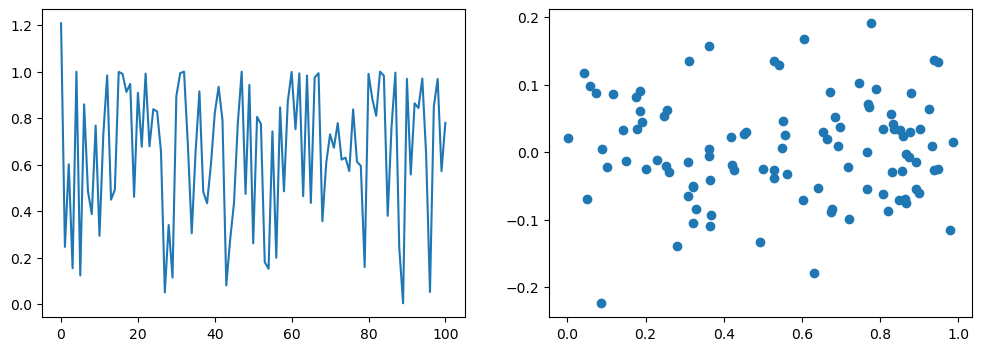

In [75]:
L = 500
k = 100
tau = 1

# initialize embedding parameters (he-et-al)
omega = np.random.random(k+1)
phi = np.random.random(k+1)*2*np.pi%omega
w = np.random.randn(k+1)*np.sqrt(2/L)

# initialize
t2v = torch.zeros(k+1)
t2v[0] = omega[0]*tau + phi[0]
for i in range(1,k+1):
    t2v[i] = np.sin(omega[i]*tau + phi[i])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(t2v)
axs[1].scatter(omega, w)
t2v

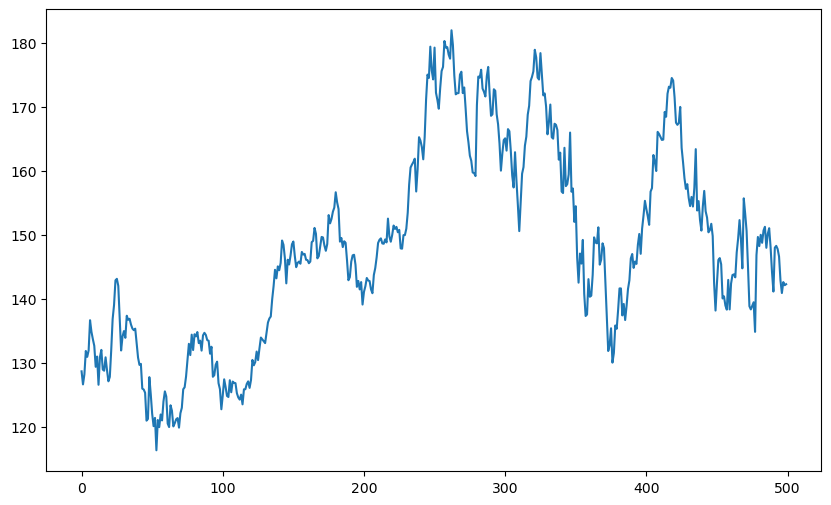

In [152]:
data = appl_prices[-500:].reset_index(drop=True)
data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data)

## Training the Embedding

We can use the masked language modeling task, adapted to this time series to obfuscate regions of the graph and predict using the surrounding information. For example, predicting the red regions of the graph below and adjusting our embeddings.

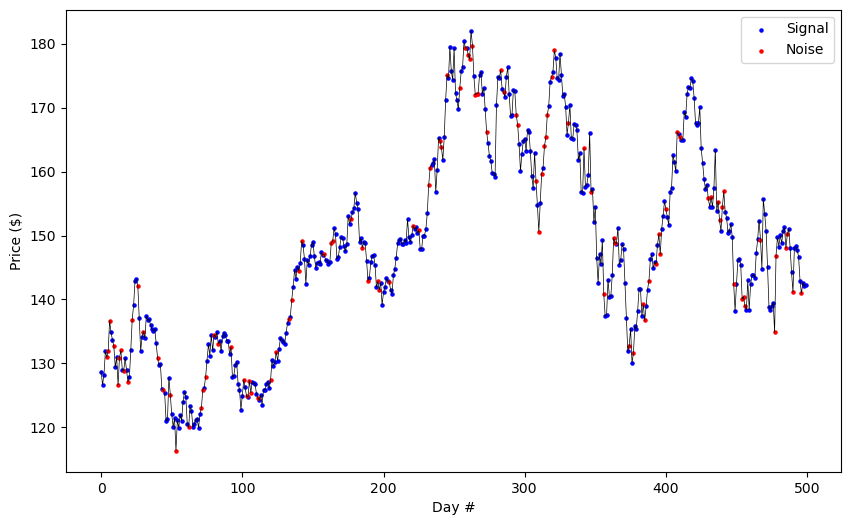

In [164]:
from matplotlib import colors

noise = sorted(np.r_[np.random.randint(len(data), size=len(data)//4)])
noisy_data = data.loc[noise]
noise = noisy_data.index.unique()
noisy_data = data.loc[noise]
clean = data.index.difference(noise)
clean_data = data.loc[clean]

masked_df = pd.concat([
    pd.DataFrame(np.stack([noisy_data, np.ones(len(noisy_data))]).T, columns=['data', 'masked'], index=noise), 
    pd.DataFrame(np.stack([clean_data, np.zeros(len(clean_data))]).T, columns=['data', 'masked'], index=clean)
]).astype({'masked': 'int'}).sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(masked_df['data'], c='k', lw=0.5)
ax.scatter(clean, clean_data, c='b', s=5, label='Signal')
ax.scatter(noise, noisy_data, c='r', s=5, label='Noise')
ax.set_xlabel('Day #')
ax.set_ylabel('Price ($)')
ax.legend()
plt.show()

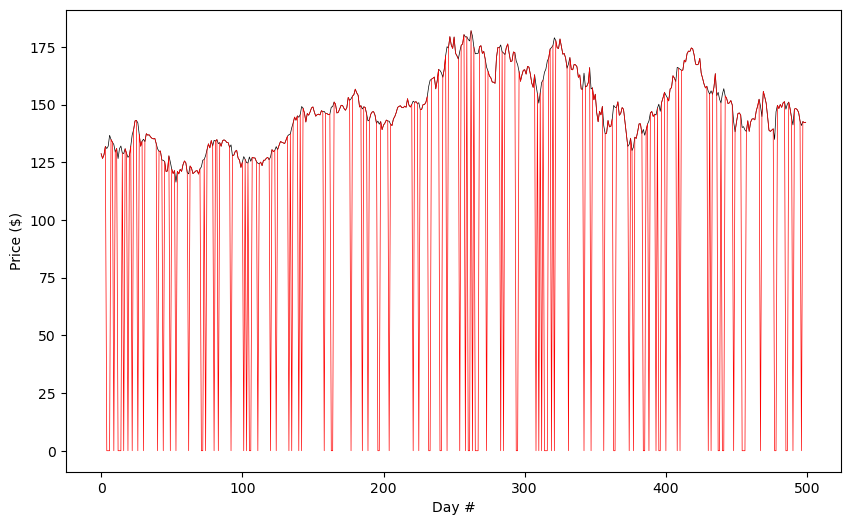

In [182]:
corrupted = np.zeros(len(noise))

corrupted_data = masked_df.apply(lambda x: x[0] if x[1] == 0 else 0, axis=1)
corrupted_df = masked_df.copy()
corrupted_df.loc[:,'data'] = corrupted_data

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(masked_df['data'], c='k', lw=0.5)
ax.plot(corrupted_df['data'], c='r', lw=0.5)
ax.set_xlabel('Day #')
ax.set_ylabel('Price ($)')
plt.show()

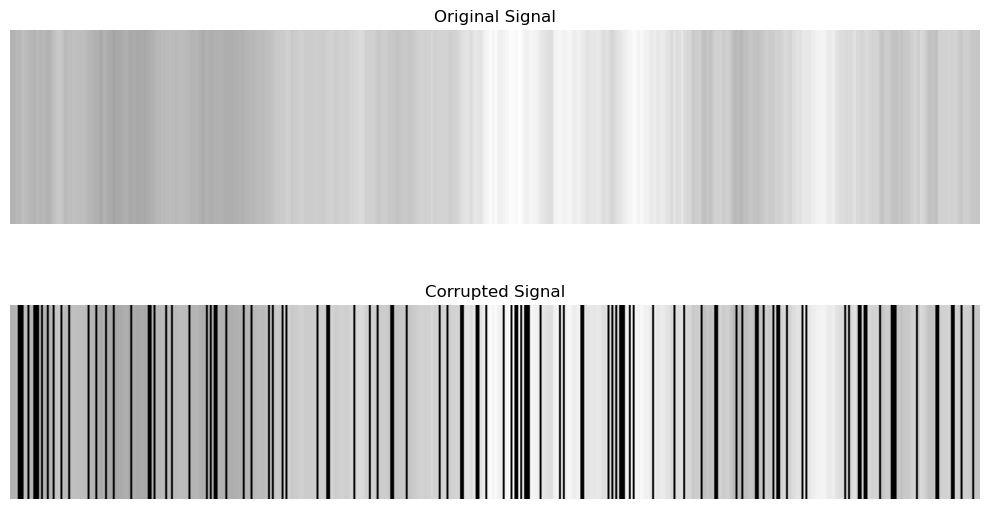

In [237]:
signal = masked_df['data'].to_numpy()
signal = signal*255//max(signal)
signal = signal
signal = np.tile(signal, (len(signal)//5, 1))

corrupted = corrupted_df['data'].to_numpy()
corrupted = corrupted*255//max(corrupted)
corrupted = corrupted
corrupted = np.tile(corrupted, (len(corrupted)//5, 1))

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].imshow(signal, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(corrupted, cmap='gray', vmin=0, vmax=255)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[0].set_title('Original Signal')
axs[1].set_title('Corrupted Signal')
plt.tight_layout()

## Training

https://pytorch.org/tutorials/beginner/examples_nn/polynomial_module.html

In [ ]:
class MaskedTickerDataset(Dataset):
    def __init__(self, ticker_path, close_only=True, as_tensor=True):
        self.ticker_path = ticker_path
        self.close_only = close_only
        self.as_tensor = as_tensor
        
        data = pd.read_csv(ticker_path)
        if self.close_only:
            data = data.loc[:,'Close']
        if self.as_tensor:
            data = torch.tensor(data)
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        ticker_path = os.path.join(self.data_dir, self.paths[idx])
        data = pd.read_csv(ticker_path)
        if self.close_only:
            data = data.loc[:,'Close']
        if self.as_tensor:
            data = torch.tensor(data)
        return data

In [77]:
class t2vModel(nn.Module):
    def __init__(self, activation=torch.sin, k=100):
        super().__init__()
        self.activation = activation
        self.k = k
        self.hidden_size = 50
        
        self.w = torch.nn.Parameter(torch.randn(()))
        self.phi = torch.nn.Parameter(torch.randn(()))
        self.fc = torch.nn.Linear(self.hidden_size, 1)
    
    def forward(self, x):
        tau = x
        v = torch.matmul(tau, self.w) + self.phi
        v[1:] = self.activation(v[1:])
        
        out = self.fc(v)
        return out

model = t2vModel()
model

t2vModel(
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

## Perform Time Series Decomposition

https://pytorch.org/docs/stable/generated/torch.Tensor.repeat.html

In [5]:
class DecompositionLayer(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=1, padding=0)
    
    def forward(self, x):
        # pad the left and right side s.t. the MA has the same length as the input
        # [a b c d e f] -> [x a b c d e f x] for kernel_sizes = 3, 4
        pad_size = (self.kernel_size-1) // 2
        front = x[:, 0:1].repeat(1, pad_size)
        end = x[:, -1:].repeat(1, pad_size)
        
        x_pad = torch.cat([front, x, end], dim=1)
        
        x_t = self.avg(x_pad)
        x_s = x - x_t
        
        return x_s, x_t

In [6]:
appl_tensor = torch.tensor(appl_prices).reshape(1, -1)

decomp = DecompositionLayer(365)
x_s, x_t = decomp(appl_tensor)
x_s, x_t

(tensor([[ 3.3818e-03, -3.2149e-03, -1.2041e-02,  ..., -4.9487e+00,
          -5.3755e+00, -5.1429e+00]], dtype=torch.float64),
 tensor([[1.2497e-01, 1.2487e-01, 1.2476e-01,  ..., 1.4760e+02, 1.4754e+02,
          1.4746e+02]], dtype=torch.float64))

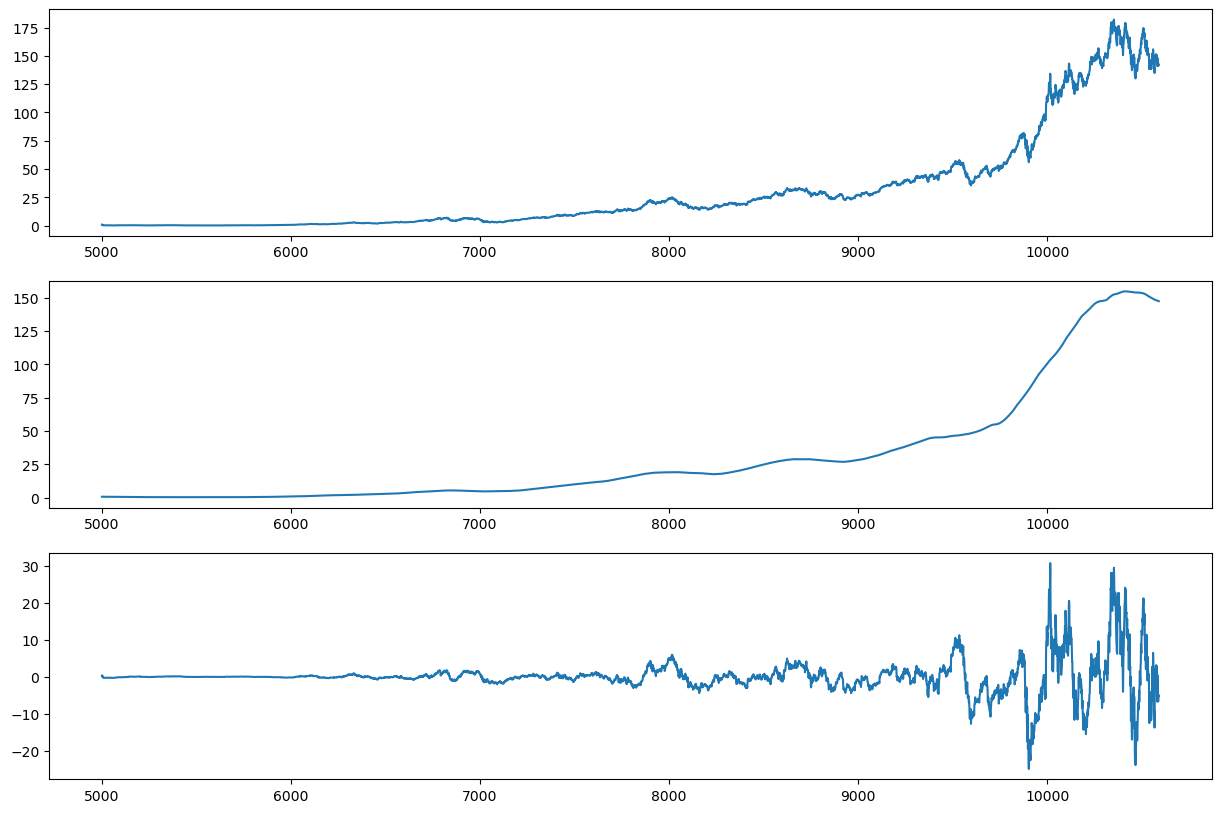

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(15,10))
axs[0].plot(appl_df.index[5000:], appl_tensor.reshape(-1)[5000:])
axs[1].plot(appl_df.index[5000:], x_t.reshape(-1)[5000:])
axs[2].plot(appl_df.index[5000:], x_s.reshape(-1)[5000:])

https://pytorch.org/docs/stable/generated/torch.fft.rfft.html

torch.Size([1, 10590])
tensor([[1.0000, 0.9992, 0.9983,  ..., 0.9975, 0.9983, 0.9992]],
       dtype=torch.float64)


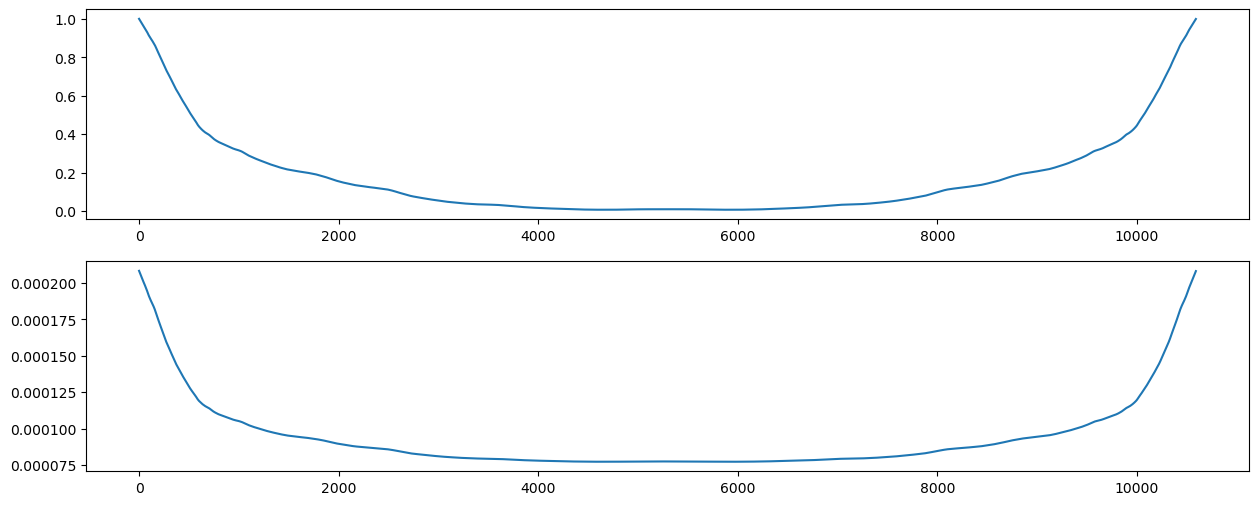

In [9]:
def autocorrelation(query_states, key_states):
    """
    Computes autocorrelation(Q,K) using `torch.fft`. 
    Think about it as a replacement for the QK^T in the self-attention.
    
    Assumption: states are resized to same shape of [batch_size, time_length, embedding_dim].
    """
    query_states_fft = torch.fft.rfft(query_states, dim=1)
    key_states_fft = torch.fft.rfft(key_states, dim=1)
    attn_weights = query_states_fft * torch.conj(key_states_fft)
    attn_weights = torch.fft.irfft(attn_weights, dim=1)  
    
    return attn_weights

R = autocorrelation(appl_tensor, appl_tensor)
print(R.shape)
R = R / max(R[0])
print(R)
R_hat = nn.functional.softmax(R - max(R[0]), dim=1)
R, R_hat
# R[0,0], R[0,-1], R_hat[0,0], R_hat[0,-1]
# plt.plot(AC.reshape(-1))

fig, axs = plt.subplots(2, 1, figsize=(15,6))
axs[0].plot(R.reshape(-1))
axs[1].plot(R_hat.reshape(-1))

In [53]:
torch.mean(R, dim=0)

tensor([15743339.6163, 15730042.1619, 15717134.5943,  ...,
        15704321.9608, 15717134.5943, 15730042.1619], dtype=torch.float64)

Autocorrelation-Attention

1. Select the top-k time lags according to some autocorrelation factor which influences the value of k

2. Compute the rolled value of the tensor at each time lag in the top-k time lags
https://pytorch.org/docs/stable/generated/torch.roll.html

3. Compute the softmax of the autocorrelation at each time lag in the top-k time lags

4. Dot the results of steps 2 and 3

5. Sum the result of steps 2-4 for all top-k

tensor([15743339.6163, 15730042.1619, 15730042.1619, 15717134.5943,
        15717134.5943, 15704321.9608, 15704321.9608, 15691931.9270,
        15691931.9270, 15679205.2522, 15679205.2522, 15665616.0708,
        15665616.0708, 15652048.1971, 15652048.1971, 15638237.7227,
        15638237.7227, 15624964.7259], dtype=torch.float64) tensor([    0,     1, 10589,     2, 10588,     3, 10587,     4, 10586, 10585,
            5,     6, 10584,     7, 10583,     8, 10582,     9])


tensor([[1.8116e+10, 1.5786e+10, 1.3466e+10,  ..., 2.4927e+10, 2.2662e+10,
         2.0443e+10]])

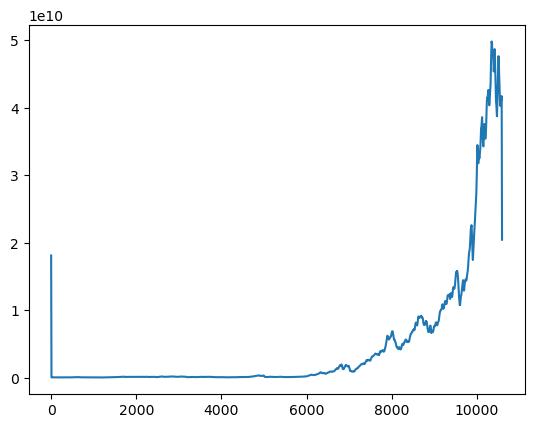

In [46]:
import math

R = autocorrelation(appl_tensor, appl_tensor)

L = appl_tensor.size(1)
AC_factor = 2
k = int(AC_factor*math.log(L))

L, k

R_mean = torch.mean(R, dim=0)
topk_R, topk_tau = torch.topk(R_mean, k, dim=0)
# topk_R = topk_R / max(topk_R[0])
print(topk_R, topk_tau)

topk_R_hat = nn.functional.softmax(topk_R - max(topk_R), dim=0)

agg = torch.zeros_like(appl_tensor).float()
for i in range(k):
    rolled = appl_tensor.roll(shifts=-int(topk_tau[i]), dims=1)
#     print(rolled, topk_R[i])
    agg += rolled * topk_R[i]

attn_output = agg.contiguous()
plt.plot(attn_output.reshape(-1))
attn_output
